<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Practicing K-Means:  Isotopic Composition Plutonium Batches

_Authors: Dave Yerrington (SF)_


---

We have a nice [data dictionary](https://vincentarelbundock.github.io/Rdatasets/doc/cluster/pluton.html)

    Pu238 : the percentages of (238)Pu, always less than 2 percent.

    Pu239 : the percentages of (239)Pu, typically between 60 and 80 percent (from neutron capture of Uranium, (238)U).

    Pu240 : percentage of the plutonium 240 isotope.

    Pu241 : percentage of the plutonium 241 isotope.
    
This is supplemental practice you can finish to get more familliar with K-Means (ie: not required).  This data is fairly odd and you will see that K-Means may not be ideal in a certain respect but the takeaway is that it can do an ok job with whispy, elongated shapes.  A more ideal model would be DBSCAN or a hierachical clustering model.

In [1]:
import pandas as pd

In [2]:
csv_file = "https://vincentarelbundock.github.io/Rdatasets/csv/cluster/pluton.csv"

df = pd.read_csv(csv_file)
df.drop(columns='Unnamed: 0', inplace=True)
df.head()

,Pu238,Pu239,Pu240,Pu241
0,0.126,75.804,21.204,2.180
1,0.133,75.515,21.408,2.240
2,0.127,75.175,21.668,2.305
3,0.156,78.872,18.428,1.906
4,0.503,73.317,20.223,4.128


###  Use Pu239 and Pu240 as our features.
1. Select only columns "Pu239" and "Pu240" to use for our example.
1. Plot "Pu239" and "Pu240" for visual reference.


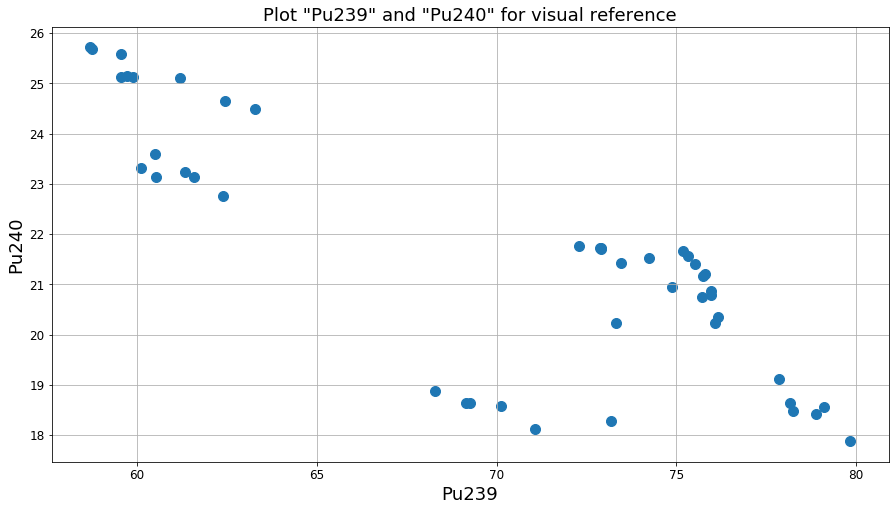

In [5]:
# A: 
import matplotlib.pyplot as plt
ax = df.plot(kind="scatter", 
             x="Pu239", 
             y="Pu240", 
             figsize=(15,8),
             s=100,
             grid=True)

plt.xlabel("Pu239", fontsize=18)
plt.ylabel("Pu240", fontsize=18)
plt.title('Plot "Pu239" and "Pu240" for visual reference', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=12)

### Next, use K-Means to cluster this data using "Pu239" and "Pu240" features
Initialize an instance of `KMeans` from `sklearn`, initialized for K=3 clusters.  Fit our sliced dataframe with the `fit`.

In [7]:
# A:
from sklearn.cluster import KMeans

features = df[['Pu239', 'Pu240']]

X = features

km = KMeans(n_clusters=3, random_state=42)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

### Assign clusters assignments (predictions) back to the original dataframe

In [16]:
# A: 
df['cluster'] = km.labels_
df.head()

,Pu238,Pu239,Pu240,Pu241,cluster
0,0.126,75.804,21.204,2.180,2
1,0.133,75.515,21.408,2.240,2
2,0.127,75.175,21.668,2.305,2
3,0.156,78.872,18.428,1.906,2
4,0.503,73.317,20.223,4.128,1


### Reference the coordinates for the centroids, plot with your "Pu239" and "Pu240" scatter plot
Plot the centroids from the model object with the scatter of "Pu239" and "Pu240".

In [17]:
# A:
centroids = pd.DataFrame(km.cluster_centers_, 
                        columns = ["Pu239", "Pu240"])

In [18]:
centroids

,Pu239,Pu240
0,60.633933,24.387533
1,71.573167,19.973917
2,76.593000,20.194833


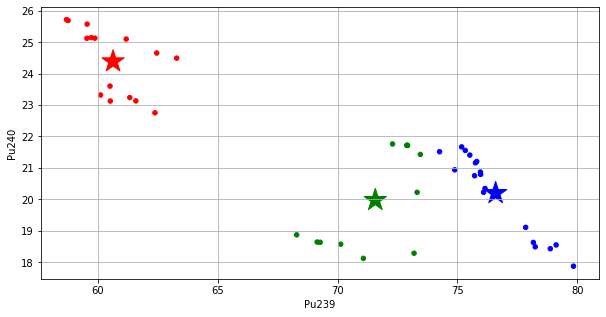

In [19]:
## Plot scatter by cluster / color, and centroids
# Plot adapted from lesson plan 
colors = ["red", "green", "blue"]
df['color'] = df['cluster'].map(lambda p: colors[p])

ax = df.plot(    
    kind="scatter", 
    x="Pu239", y="Pu240",
    figsize=(10,5), 
    grid=True, 
    c = df['color'])

centroids.plot(kind="scatter", 
               x="Pu239", 
               y="Pu240", 
               marker="*", 
               c=["r", "g", "b"], 
               s=550,
               grid=True,
               ax=ax);

### Scale your data, rerun your model, then plot.
This should help slightly but you should compare before and after.

In [35]:
# A:
from sklearn.preprocessing import StandardScaler
X = features
sc = StandardScaler()
X_sc = sc.fit_transform(X)
km_sc = KMeans(n_clusters=3, random_state=42)
km_sc.fit(X_sc)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [41]:
centroids_sc = pd.DataFrame(sc.inverse_transform(km_sc.cluster_centers_), 
                        columns = ["Pu239", "Pu240"])

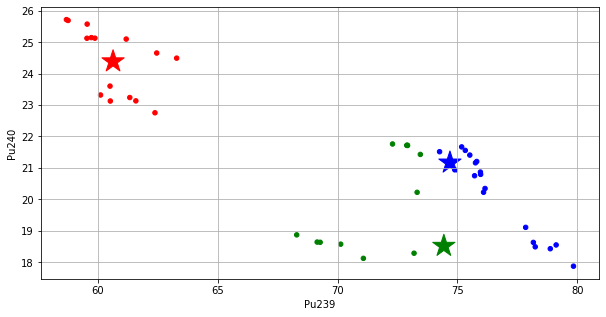

In [42]:
ax = df.plot(    
    kind="scatter", 
    x="Pu239", y="Pu240",
    figsize=(10,5), 
    grid=True, 
    c = df['color'])

centroids_sc.plot(kind="scatter", 
               x="Pu239", 
               y="Pu240", 
               marker="*", 
               c=["r", "g", "b"], 
               s=550,
               grid=True, 
               ax=ax);
        

### Might as well check that silhouette score
Just to confirm what your eyes are telling you.

In [13]:
# A: 
from sklearn.metrics import silhouette_score
silhouette_score(X_sc, km_sc.labels_)

0.6332174776862322

# THE END